import libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
songs = pd.read_csv('data/df_audio_features_5000.csv')
songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


preparing and preprocessing data

In [9]:
#display columns
songs.columns

#strip whitespace from column names as there are some whitespaces in the column names. 
# Whitespaces cause problems when I try to display the columns
songs.columns = songs.columns.str.strip()
songs.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

In [30]:

songs['name_artist_id'] = songs['name'] + ' - ' + songs['artist'] + ' - ' + songs['id']
songs.head(3)

#see alternative ways to combine columns in 1000 songs file

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,name_artist,name_artist_id
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,Se Eu Quiser Falar Com Deus ...,Se Eu Quiser Falar Com Deus ...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,Saudade De Bahia ...,Saudade De Bahia ...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.730,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,"Canta Canta, Minha Gente ...","Canta Canta, Minha Gente ..."


In [31]:
#filter out html, song_name, artist, id columns
filtered_songs = songs.drop(['html', 'name', 'artist', 'id', 'type'], axis=1)

#ALTERNATIVELY
# Filter out columns with object data type. But in this case we also lose the name_artist_id column
# filtered_songs = songs.select_dtypes(exclude=['object'])

# OR
# filtered_songs = songs.drop(['html', 'name', 'artist', 'id'], axis=1).select_dtypes(exclude=['object'])

filtered_songs.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name_artist,name_artist_id
0,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,Se Eu Quiser Falar Com Deus ...,Se Eu Quiser Falar Com Deus ...
1,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,Saudade De Bahia ...,Saudade De Bahia ...
2,0.851,0.730,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,"Canta Canta, Minha Gente ...","Canta Canta, Minha Gente ..."


In [32]:
#set the index to name_artist. Not name_artist_id like in 10_songs because I think it's easier to read and it is unique
filtered_songs.set_index('name_artist_id', inplace=True)
filtered_songs.sample(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name_artist
name_artist_id,,,,,,,,,,,,,,
Symphony (feat. Zara Larsson) - Clean Bandit - 1x5sYLZiu9r5E43kMlt9f8,0.707,0.6290,0,-4.581,0,0.0563,0.2590,0.000016,0.138,0.457,122.863,212459,4,Symphony (feat. Zara Larsson) ...
Going to Georgia - The Mountain Goats - 4AlZ0FgehhgtLHddKx0Ou7,0.330,0.7560,0,-3.559,1,0.0368,0.0814,0.004530,0.153,0.582,128.951,201894,4,Going to Georgia ...
Let's Do It - Eartha Kitt - 67fFApZyHZ9LjsvkUQJShY,0.653,0.0518,8,-19.594,1,0.0359,0.8740,0.000002,0.242,0.426,96.591,185467,4,Let's Do It ...


<AxesSubplot:>

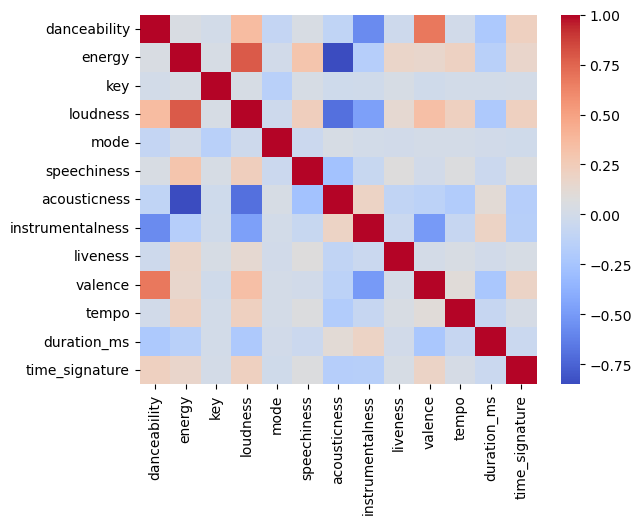

In [37]:
sns.heatmap(filtered_songs.corr(), cmap='coolwarm')

In [34]:
#shortened version of songs dataframe
songs_short = filtered_songs.drop(['time_signature', 'key', 'duration_ms'], axis=1)
songs_short.head(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,name_artist
name_artist_id,,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil - 1n7JnwviZ7zf0LR1tcGFq7,0.658,0.259,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,Se Eu Quiser Falar Com Deus ...
Saudade De Bahia - Antônio Carlos Jobim - 5QGM1U0eCYrQuwSJwTm5Zq,0.742,0.399,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,Saudade De Bahia ...
"Canta Canta, Minha Gente - Martinho Da Vila - 0NLIFSZxPzQhCwnkn5PJYs",0.851,0.730,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,"Canta Canta, Minha Gente ..."


<AxesSubplot:>

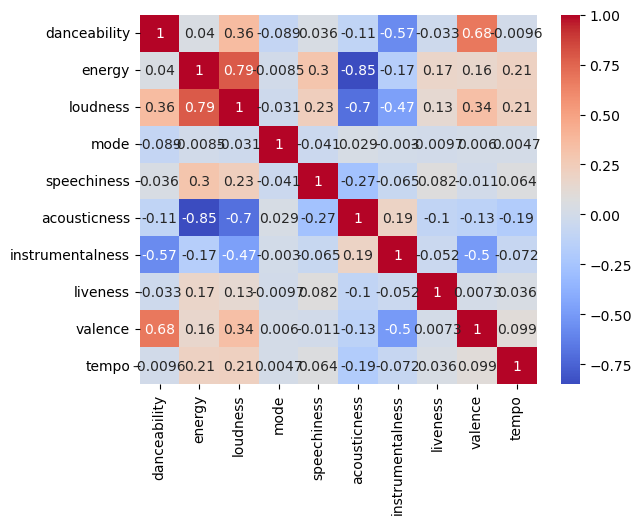

In [38]:
sns.heatmap(songs_short.corr(), annot=True, cmap='coolwarm')

MODELLING. Data scaling

In [20]:
#preprocessing and scaling data for clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [25]:
# MinMaxScaler
songs_minmax = MinMaxScaler().fit_transform(songs_short)
songs_minmax = pd.DataFrame(songs_minmax, columns=songs_short.columns, index=songs_short.index)
songs_minmax.head(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name_artist,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil,0.680455,0.259,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia - Antônio Carlos Jobim,0.767322,0.399,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente - Martinho Da Vila",0.880041,0.730,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862


In [27]:
# StandardScaler
songs_standard = StandardScaler().fit_transform(songs_short)
songs_standard = pd.DataFrame(songs_standard, columns=songs_short.columns, index=songs_short.index)
songs_standard.head(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name_artist,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil,0.681116,-1.368556,-0.604187,-1.351545,-0.178099,1.134867,-0.694125,5.285610,-0.495488,-0.292147
Saudade De Bahia - Antônio Carlos Jobim,1.066401,-0.882963,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160
"Canta Canta, Minha Gente - Martinho Da Vila",1.566355,0.265117,-0.271661,0.739894,3.706071,0.457807,-0.694112,-0.410678,1.661526,-0.875994


Modelling. KMeans

In [28]:
from sklearn.cluster import KMeans

<AxesSubplot:xlabel='danceability', ylabel='energy'>

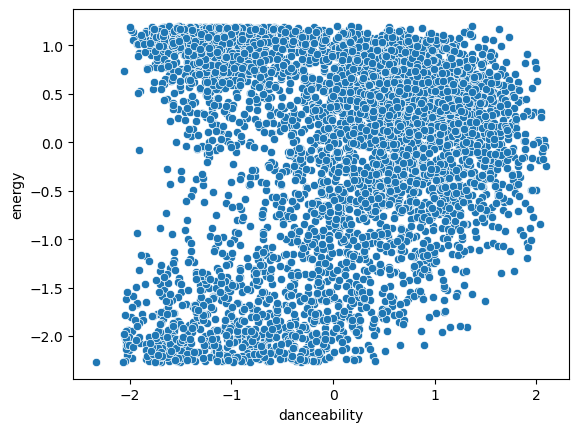

In [29]:
sns.scatterplot(data=songs_standard, x='danceability', y='energy')

In [65]:
songs_kmeans = KMeans(n_clusters=10, random_state=42).fit(songs_standard)
songs_kmeans

KMeans(n_clusters=10, random_state=42)

Visualize the relation between variables

In [66]:
#calculate centroids
centroids = pd.DataFrame(songs_kmeans.cluster_centers_, columns=songs_standard.columns)
centroids

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.820291,0.246344,0.514909,-1.351545,-0.232885,-0.363211,-0.602752,-0.186785,0.552229,-0.044202
1,-0.960748,-1.865250,-2.141325,-0.057871,-0.535684,1.810009,1.555049,-0.359423,-1.086486,-0.526639
2,-0.925659,0.852096,0.275103,-1.351545,0.251122,-0.767579,0.809128,0.003509,-0.785176,0.133304
3,0.079406,0.245487,0.379331,0.470754,-0.221798,-0.088268,-0.499198,-0.188941,0.819852,1.606629
4,-0.480856,0.668243,0.492408,0.739894,0.048541,-0.688634,-0.523265,-0.101897,-0.715177,-0.036432
5,0.793562,0.249253,0.500839,-0.165678,3.000020,-0.335609,-0.634267,-0.078980,0.494804,0.087336
6,0.217048,0.324665,0.337327,-0.074396,0.108029,-0.185355,-0.416170,3.180542,0.183922,0.121084
7,0.897866,0.180176,0.374780,0.739894,-0.338986,-0.282157,-0.596673,-0.179570,0.951801,-0.271559
8,-1.140535,0.875093,0.169267,0.739894,0.299909,-0.792750,1.411480,0.061324,-0.775013,0.089304
9,0.024427,-1.230323,-0.596076,0.175952,-0.533788,1.376594,-0.437778,-0.254530,-0.127448,-0.262696


In [67]:
#plot data
plot_data = songs_standard.copy()

#add cluster column
plot_data['cluster'] = songs_kmeans.labels_

#another way suggested by wbs
# plot_data = pd.DataFrame(songs_standard) #, columns=songs_standard.columns)
# plot_data['cluster'] = songs_kmeans.labels_
plot_data.head(3)


,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name_artist,,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil,0.681116,-1.368556,-0.604187,-1.351545,-0.178099,1.134867,-0.694125,5.285610,-0.495488,-0.292147,6
Saudade De Bahia - Antônio Carlos Jobim,1.066401,-0.882963,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160,7
"Canta Canta, Minha Gente - Martinho Da Vila",1.566355,0.265117,-0.271661,0.739894,3.706071,0.457807,-0.694112,-0.410678,1.661526,-0.875994,5


<AxesSubplot:xlabel='danceability', ylabel='instrumentalness'>

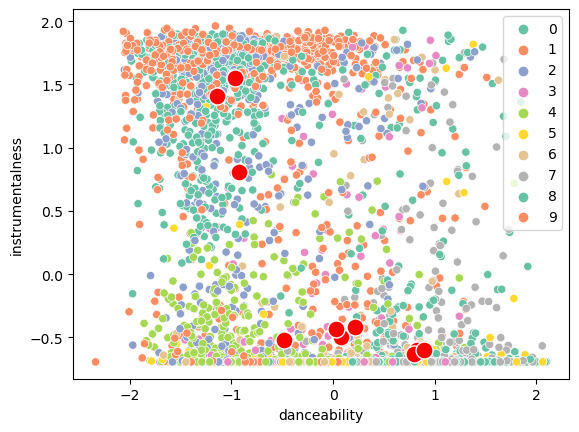

In [68]:
#you can use other variables. This bivariate plot is just for illustration
sns.scatterplot(data=plot_data, x='danceability', y='instrumentalness', hue='cluster', palette='Set2')
# sns.scatterplot(data=plot_data, x='danceability', y='liveness', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='instrumentalness', color='red', s=150)
# plt.show()

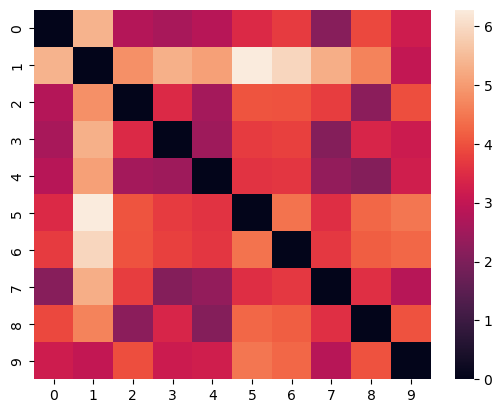

In [69]:
#calculate manhattan and euclidean distances
def manhattan_distance(data, song, song_to_compare): 
    distance = (
        pd.DataFrame({
            'song_1':data.loc[song,:],
            'song_2':data.loc[song_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: abs(x.song_1 - x.song_2))
        .agg({'dist_abs':'sum'})[0]
    )
    return distance

def euclidean_distance(data, song, song_to_compare): 
    distance = (
        pd.DataFrame({
            'song_1':data.loc[song,:],
            'song_2':data.loc[song_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: (x.song_1 - x.song_2)**2)
        .agg({'dist_abs':'sum'})[0]**0.5
    )
    return distance


def get_distances(data, distance_type='euclidean'):
    """
    Given a dataframe, return the distance between all the indexes. 
    We assume the indexes represents the users/songs. 
    Args: 
        * dataset 
        * distance type to perform the operation (euclidean or manhattan)
    """
    if distance_type == 'manhattan': 
        distances = [[manhattan_distance(data, song, song_to_compare) for song in data.index] for song_to_compare in data.index]
    else: 
        distances = [[euclidean_distance(data, song, song_to_compare) for song in data.index] for song_to_compare in data.index]
        
    return pd.DataFrame(distances, columns=data.index, index=data.index)


sns.heatmap(get_distances(centroids))
plt.show()


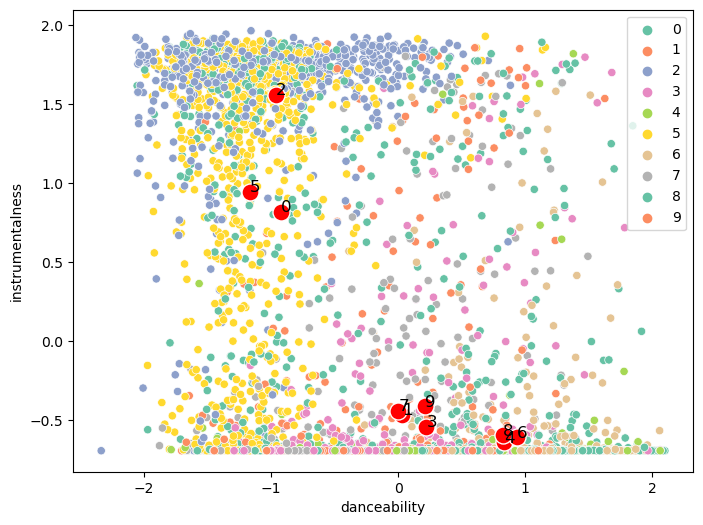

In [79]:
# visualization of the clusters with centroids
temp_kmeans = KMeans(n_clusters=10).fit(songs_standard)

centroids_temp = pd.DataFrame(temp_kmeans.cluster_centers_, columns=songs_standard.columns)
# centroids_temp.columns = songs_standard.columns #another way of defining columns
centroids_temp['cluster_name'] = centroids_temp.index
# centroids_temp = centroids_temp.set_index(centroids_temp.index + 1)

plot_data['cluster'] = temp_kmeans.labels_

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=plot_data, x='danceability', y='instrumentalness', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids_temp, x='danceability', y='instrumentalness', color='red', s=150)
for i in range(centroids_temp.shape[0]):
    # plt.text(centroids_temp.iloc[i,0], centroids_temp.iloc[i,1], centroids_temp.iloc[i,2], fontsize=12) #this verion has long float numbers next to some centroids
    plt.text(x=centroids_temp['danceability'][i], y=centroids_temp['instrumentalness'][i], s=centroids_temp['cluster_name'][i], size=12) # here each centroid has a number

# plt.show()

dist_temp = get_distances(centroids_temp.drop('cluster_name', axis=1))


<AxesSubplot:>

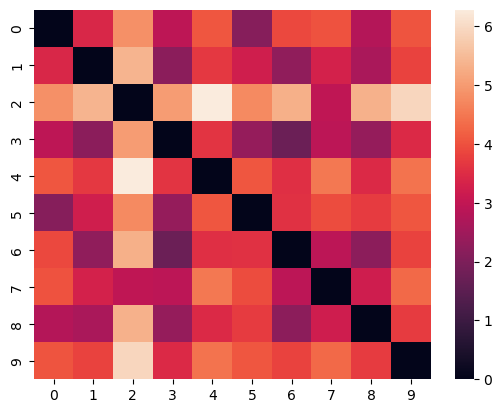

In [80]:
sns.heatmap(dist_temp)

Using intertia

In [81]:
songs_kmeans.inertia_

20304.133159047553

In [96]:
len(songs_standard)

5235

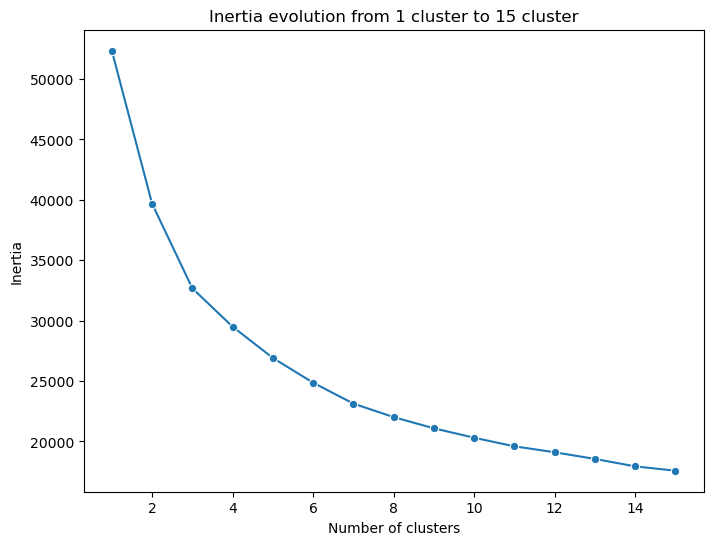

In [110]:
# this code produced value error: All arrays must be of the same length because indentation was wrong. 
#the code for plotting the graph was inside the loop. This means that a new plot is created for each iteration of the loop. 
# To fix the error, you need to move the code for plotting the graph outside the loop, so that only one plot is created with all the data.
# I had to move it to the left to make it work
max_k = 15
inertia = []

for k in range(1, max_k+1):
    inertia.append(KMeans(n_clusters=k, random_state=42).fit(songs_standard).inertia_)

fig, ax = plt.subplots(figsize=(8,6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k+1), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [97]:
# check the value of inertia at each iteration (of each k ) of the loop. Each time the number of clusters increases, the inertia decreases
# the inertia is the sum of the squared distances between each point and its centroid

inertia = []
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(songs_standard)
    inertia.append(kmeans.inertia_)
    print(f"k = {k}, inertia = {inertia[-1]}")

k = 1, inertia = 52349.99999999999
k = 2, inertia = 39682.190897025896
k = 3, inertia = 32674.81542566727
k = 4, inertia = 29499.676121015516
k = 5, inertia = 26911.16635956571
k = 6, inertia = 24861.31004346957
k = 7, inertia = 23131.80911286574
k = 8, inertia = 22011.17935627918
k = 9, inertia = 21085.733325969504
k = 10, inertia = 20304.133159047553
k = 11, inertia = 19594.120577943573
k = 12, inertia = 19101.492281287225
k = 13, inertia = 18549.483840048953
k = 14, inertia = 17933.556394569576


k = 1, inertia = 52349.99999999999
k = 2, inertia = 39682.190897025896
k = 3, inertia = 32674.81542566727
k = 4, inertia = 29499.676121015516
k = 5, inertia = 26911.16635956571
k = 6, inertia = 24861.31004346957
k = 7, inertia = 23131.80911286574
k = 8, inertia = 22011.17935627918
k = 9, inertia = 21085.7333259695
k = 10, inertia = 20304.133159047553
k = 11, inertia = 19594.120577943573
k = 12, inertia = 19101.492281287225
k = 13, inertia = 18549.483840048953
k = 14, inertia = 17933.556394569576
k = 15, inertia = 17573.696785558393


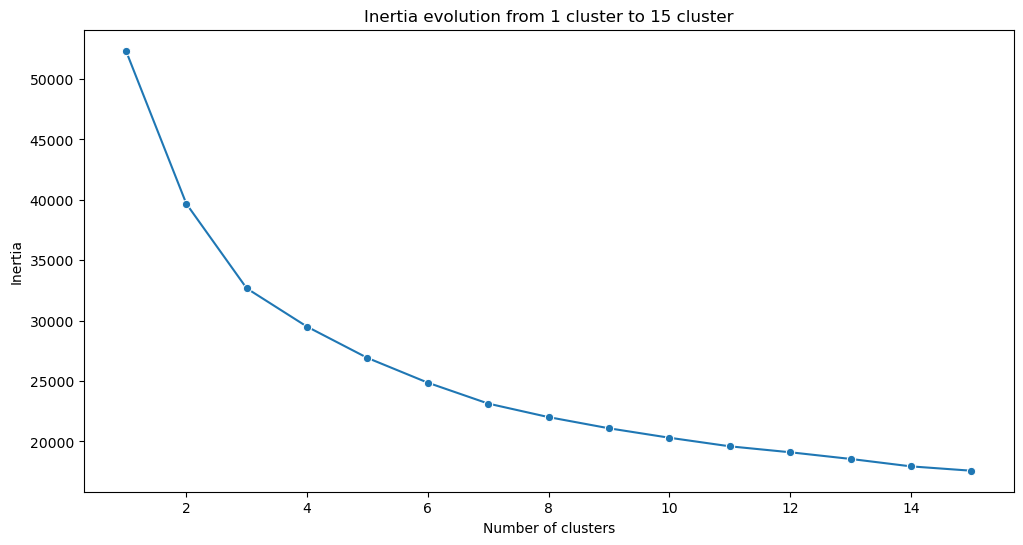

In [102]:
# this plot the inertia evolution works
inertia = []

for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(songs_standard)
    inertia.append(kmeans.inertia_)
    print(f'k = {k}, inertia = {kmeans.inertia_}')
    
plt.figure(figsize=(12,6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k+1), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



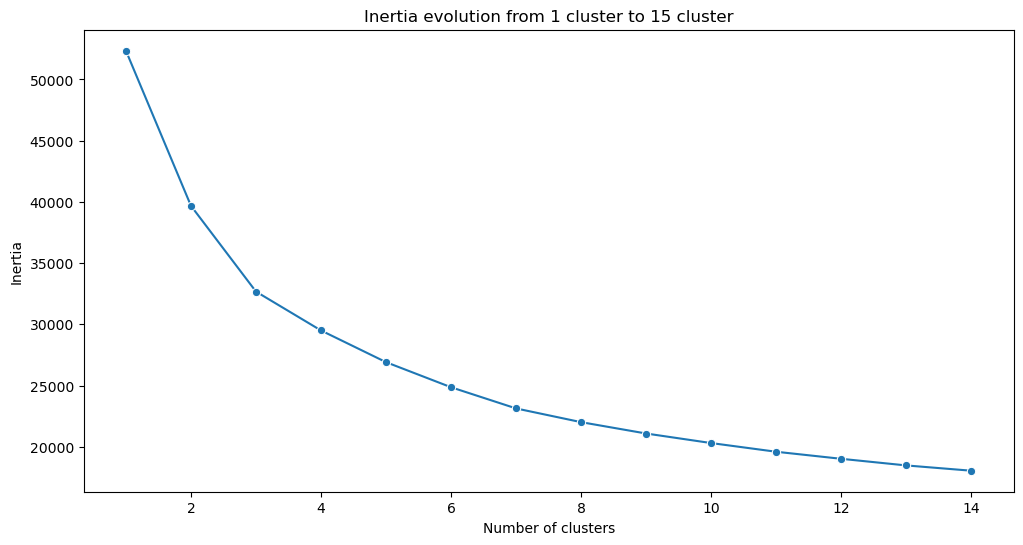

In [111]:
# this code is from the solution notebook. It works
max_k = 15
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(songs_standard).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Silhouette score

In [112]:
from sklearn.metrics import silhouette_score
silhouette_score(songs_standard, songs_kmeans.labels_)

0.19307025552642249

<AxesSubplot:title={'center':'Silhouette score evolution from 2 clusters to 15 clusters'}>

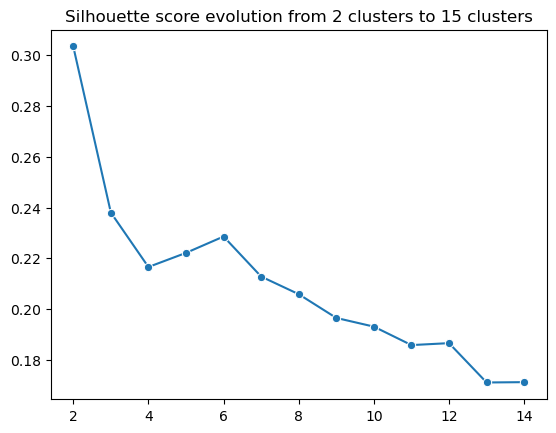

In [113]:
# for loop for silhouette score

max_k = 15
sil_score = []

for k in range(2, max_k):
    labels = KMeans(n_clusters=k, random_state=42).fit(songs_standard).labels_
    sil_score.append(silhouette_score(songs_standard, labels))
    #if you want to split the code in tow lines, you need to create a variable for the KMeans object
    # kmeans = KMeans(n_clusters=k, random_state=42)
    # kmeans.fit(songs_standard)
    # sil_score.append(silhouette_score(songs_standard, kmeans.labels_))
    # print(f'k = {k}, silhouette score = {sil_score[-1]}')

plt.title(f'Silhouette score evolution from 2 clusters to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
# plt.show()


# The silhouette coefficient can vary between -1 and +1:
# A value close to +1 means that the point is well inside its own cluster and far from other clusters.
# A value close to -1 means that the point is close to the border between two clusters.  -1 the instance may have been assigned to the wrong cluster.
# A value close to 0 means that the point is close to the border between two clusters. 0 the instance is close to a cluster boundary.



* For k = 2 the average to silhouette is: 0.3034
	- For cluster = 0 the silhouette value is: 0.33
	- For cluster = 1 the silhouette value is: 0.3


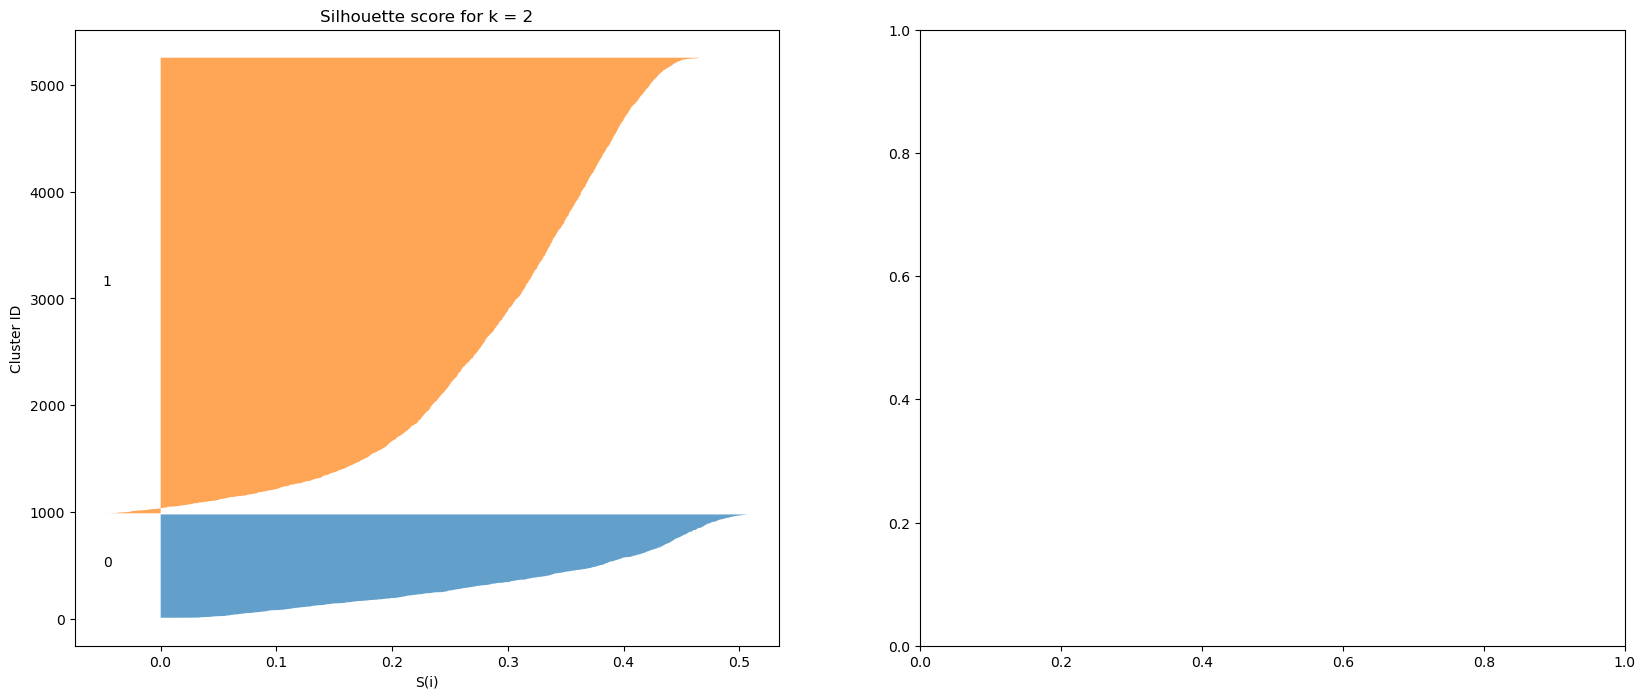

* For k = 3 the average to silhouette is: 0.238
	- For cluster = 0 the silhouette value is: 0.23
	- For cluster = 1 the silhouette value is: 0.22
	- For cluster = 2 the silhouette value is: 0.32


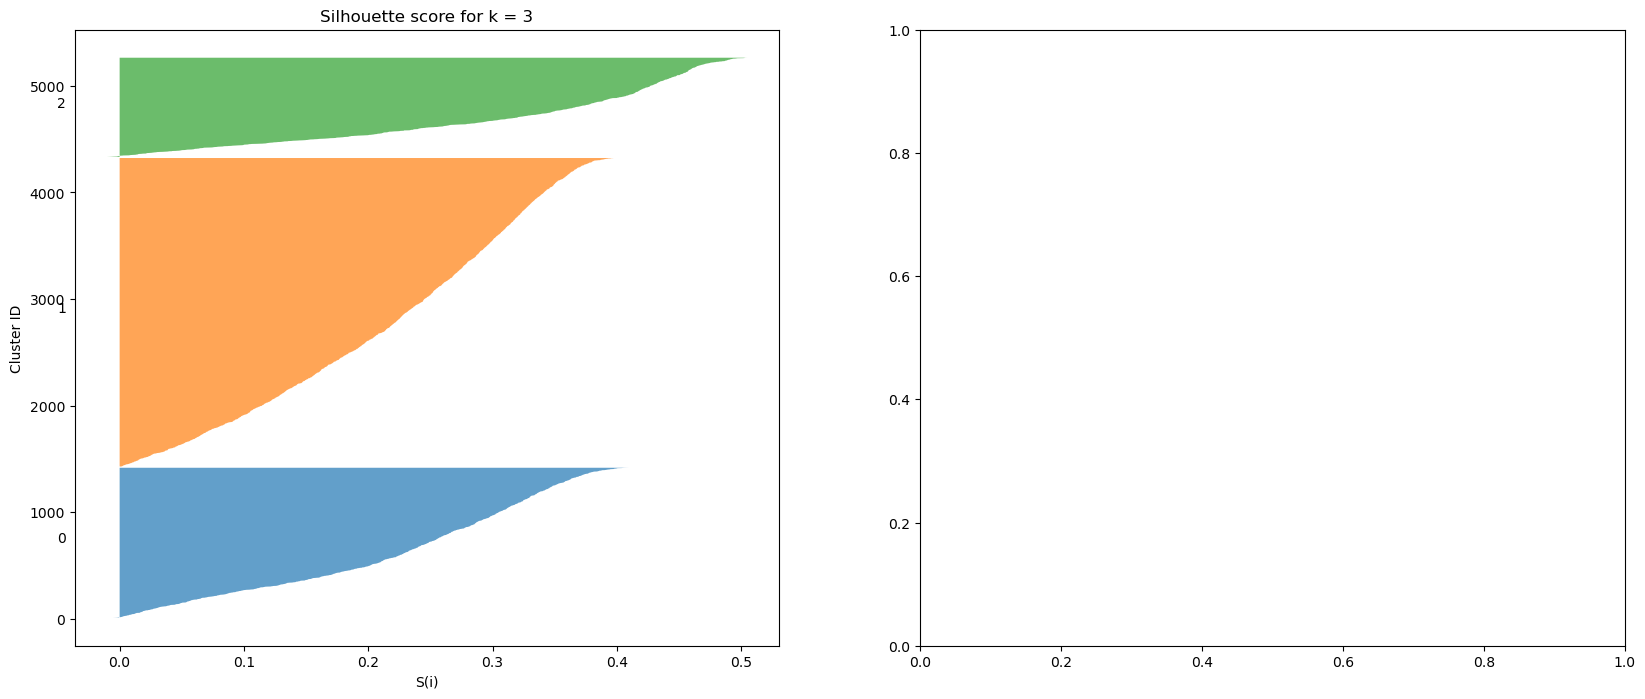

* For k = 4 the average to silhouette is: 0.2165
	- For cluster = 0 the silhouette value is: 0.32
	- For cluster = 1 the silhouette value is: 0.19
	- For cluster = 2 the silhouette value is: 0.17
	- For cluster = 3 the silhouette value is: 0.23


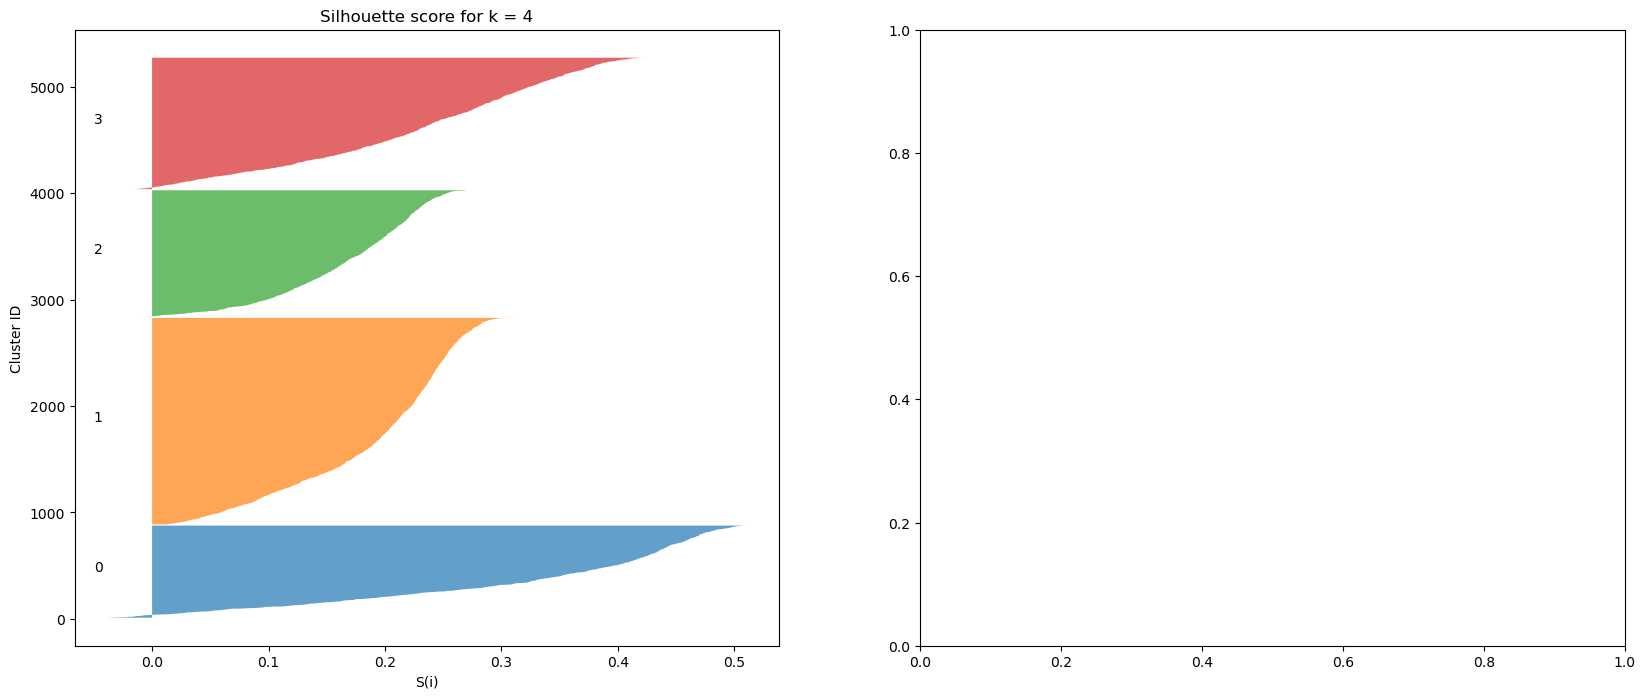

* For k = 5 the average to silhouette is: 0.2222
	- For cluster = 0 the silhouette value is: 0.2
	- For cluster = 1 the silhouette value is: 0.2
	- For cluster = 2 the silhouette value is: 0.31
	- For cluster = 3 the silhouette value is: 0.12
	- For cluster = 4 the silhouette value is: 0.23


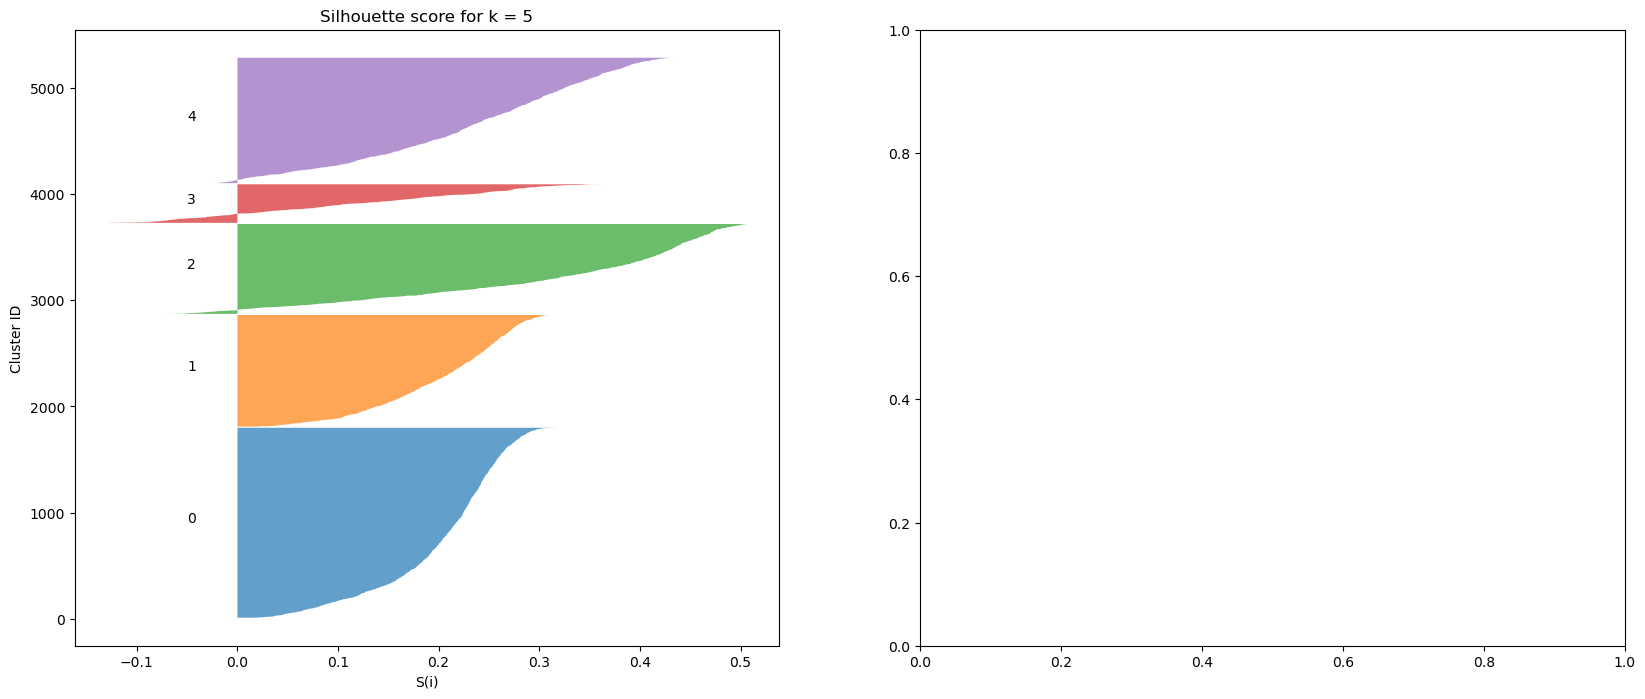

* For k = 6 the average to silhouette is: 0.2286
	- For cluster = 0 the silhouette value is: 0.13
	- For cluster = 1 the silhouette value is: 0.32
	- For cluster = 2 the silhouette value is: 0.22
	- For cluster = 3 the silhouette value is: 0.22
	- For cluster = 4 the silhouette value is: 0.24
	- For cluster = 5 the silhouette value is: 0.13


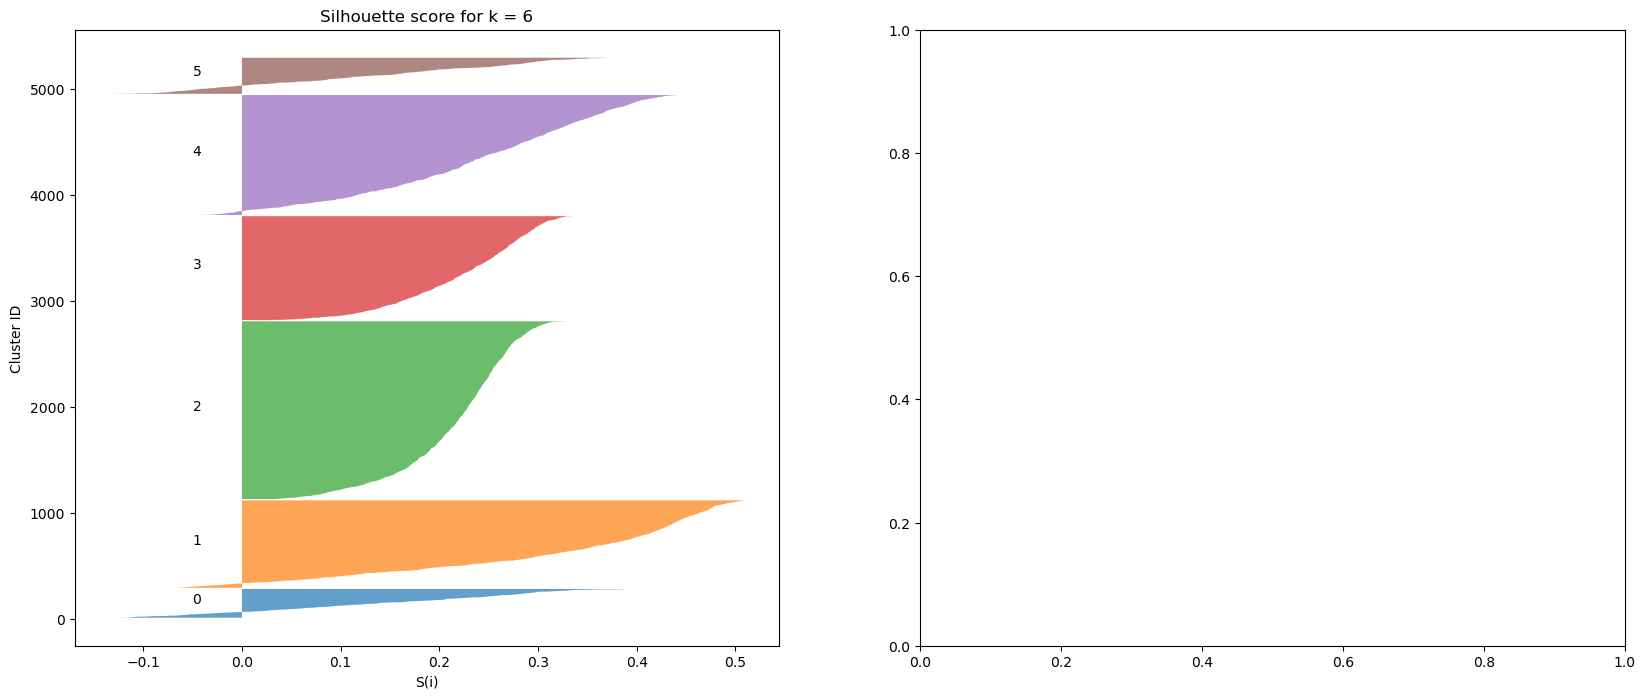

* For k = 7 the average to silhouette is: 0.2128
	- For cluster = 0 the silhouette value is: 0.27
	- For cluster = 1 the silhouette value is: 0.23
	- For cluster = 2 the silhouette value is: 0.22
	- For cluster = 3 the silhouette value is: 0.13
	- For cluster = 4 the silhouette value is: 0.15
	- For cluster = 5 the silhouette value is: 0.23
	- For cluster = 6 the silhouette value is: 0.12


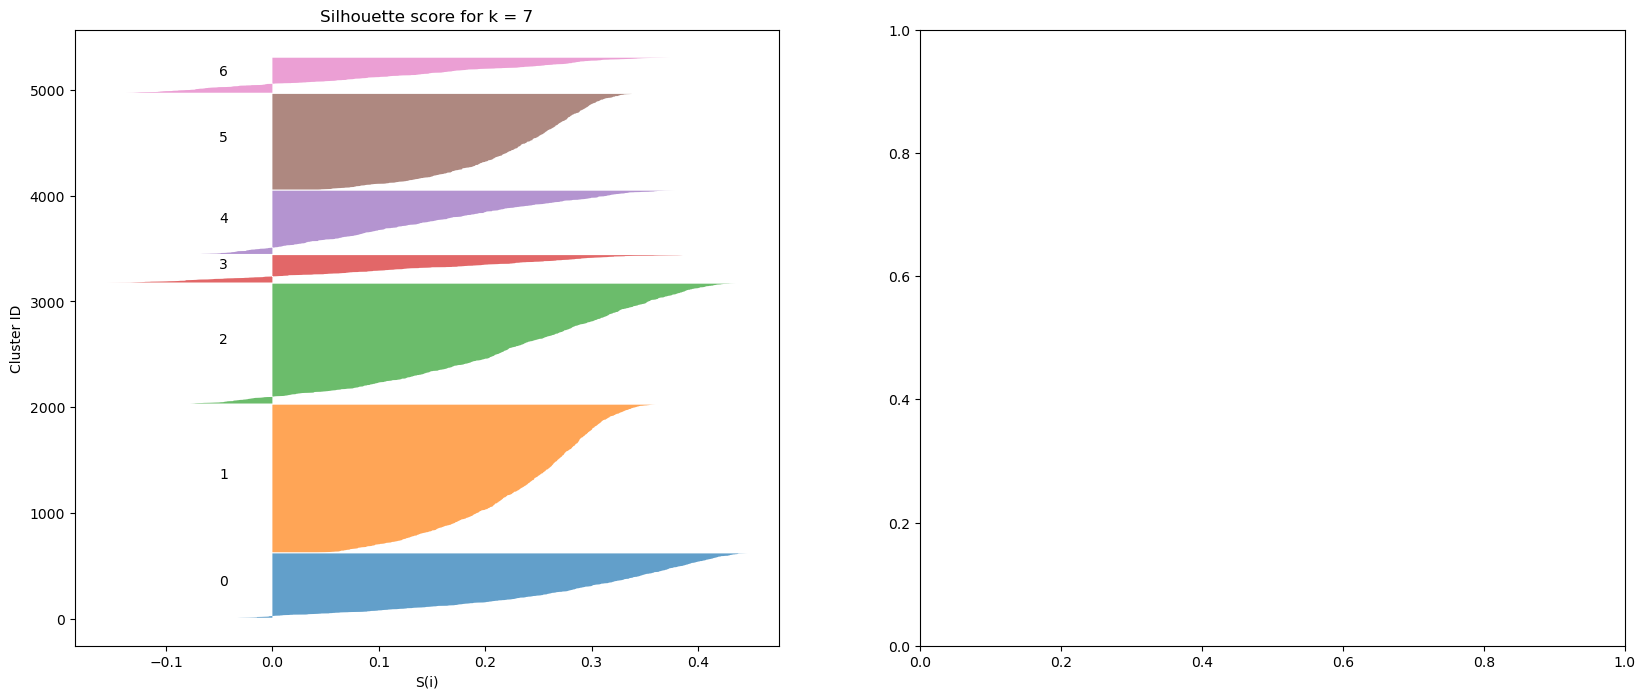

In [114]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

max_k = 8
data = songs_standard

for k in range(1, max_k): 
    kmean_model = KMeans(n_clusters=k).fit(data)
    labels = kmean_model.labels_
    
    if 1 < k < data.shape[0]: 
        
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)
        
        y_lower = 10
        
        for i in range(k): 
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")
            
            ith_cluster_sv.sort()
            
            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
 
            
            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, 
                                alpha = 0.7)
            
            
            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
            
            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation
            
        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")

    # if 1 < k: 
    #     centr_df_temp = pd.DataFrame(kmean_model.cluster_centers_)
    #     centr_df_temp.columns = columns
    #     centr_df_temp['cluster_name'] = centr_df_temp.index

    #     plot_data = pd.DataFrame(data)
    #     plot_data.columns = columns
    #     plot_data['cluster'] = kmean_model.predict(data)

    #     plt.title('Penguins clusters with centroids using Kmeans')
    #     sns.scatterplot(data=plot_data, x= 'bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2')
    #     sns.scatterplot(data=centr_df_temp, x= 'bill_length_mm', y='bill_depth_mm', color='red', s=150)
    #     for i in range(centr_df_temp.shape[0]):
    #         plt.text(
    #             x=centr_df_temp.bill_length_mm[i], 
    #             y=centr_df_temp.bill_depth_mm[i],
    #             s=centr_df_temp.cluster_name[i], 
    #             size=20
    #         )
        plt.show()

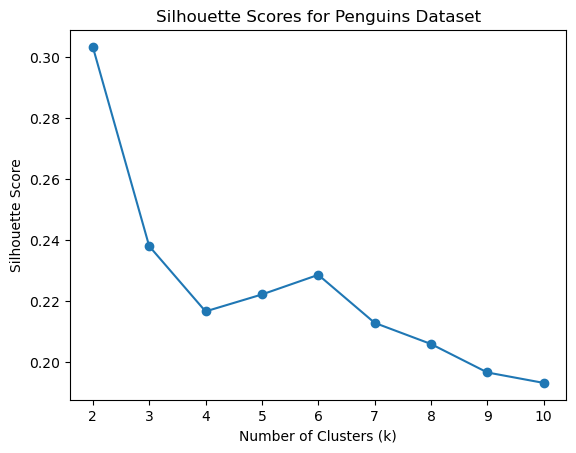

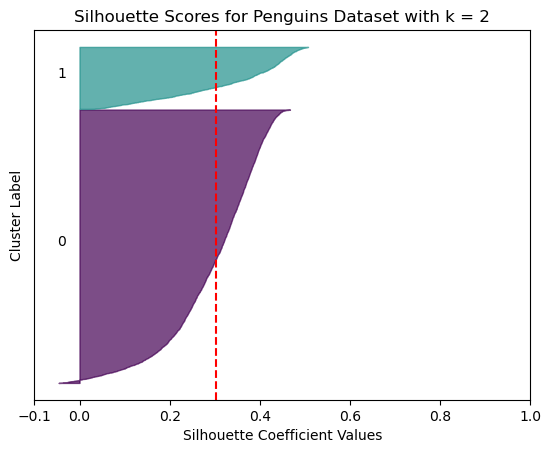

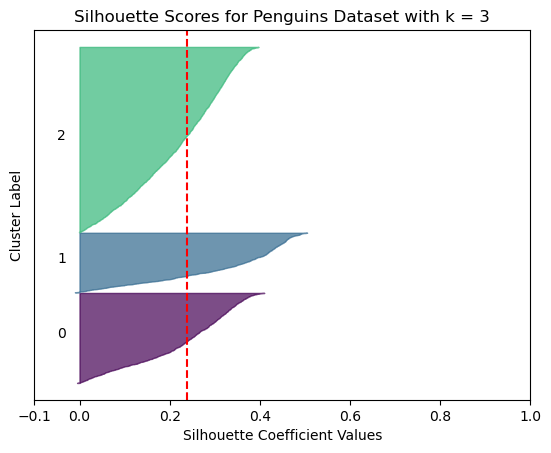

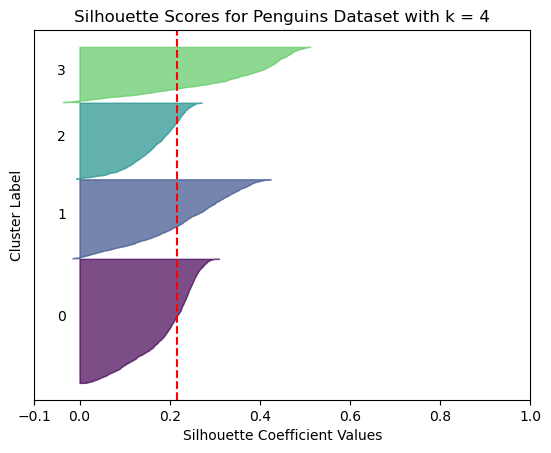

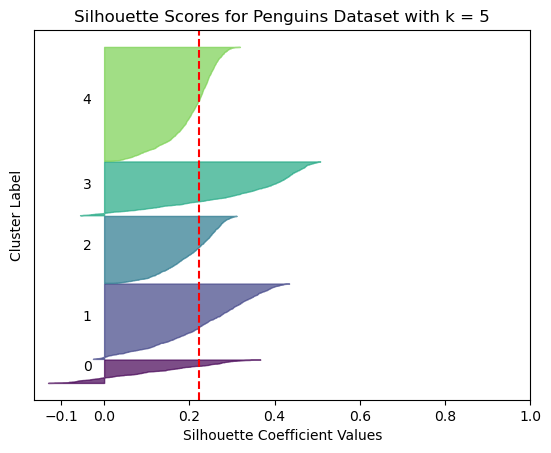

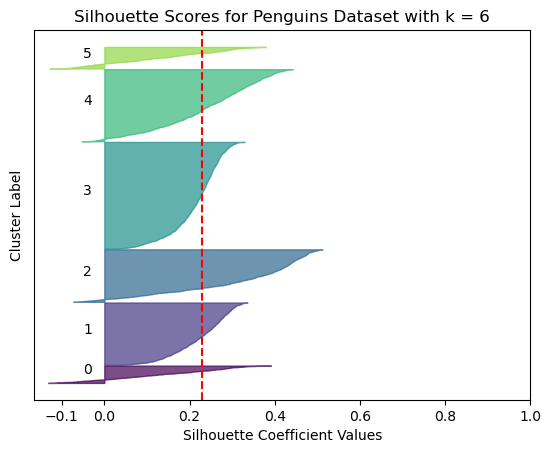

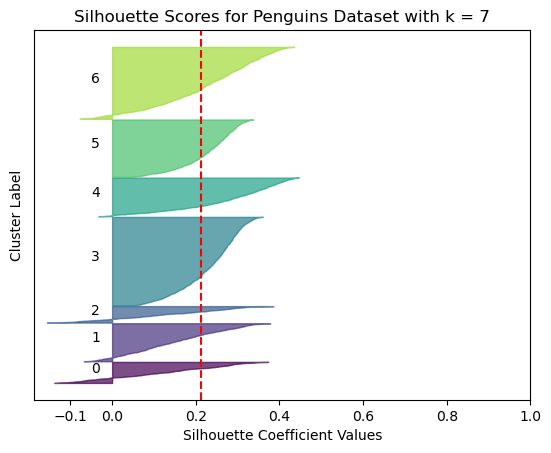

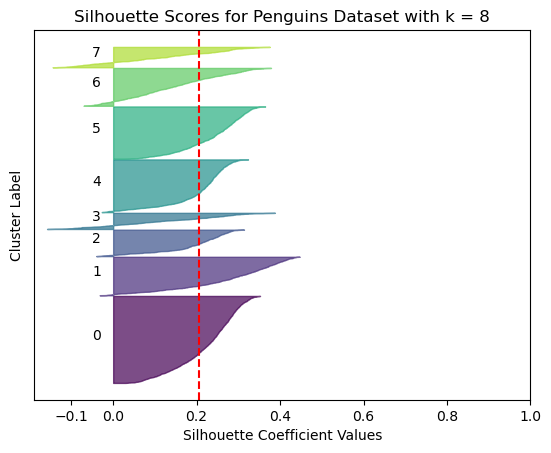

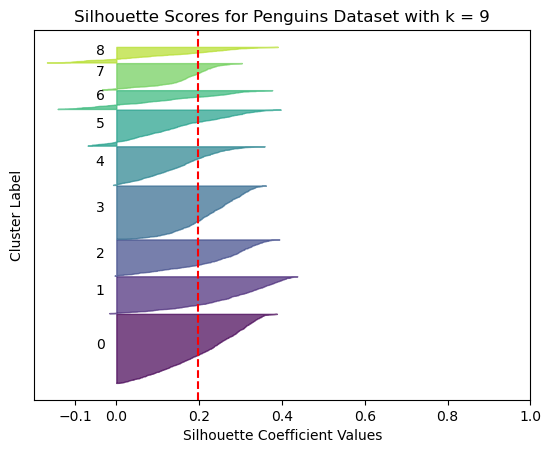

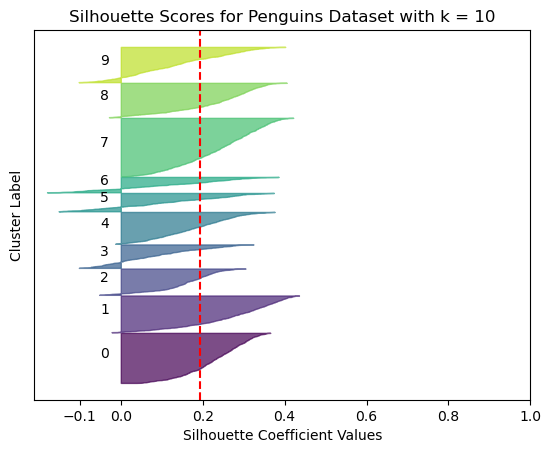

In [115]:
# This code provides a better visualisation of the knives chart
# from sklearn.metrics import silhouette_samples
from matplotlib.cm import get_cmap
# import seaborn as sns
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Load the penguins dataset
# penguins = sns.load_dataset("penguins")

# # Drop rows with missing values
# penguins = penguins.dropna()

# # Prepare the features for clustering
# features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
# scaled_features = StandardScaler().fit_transform(features)

features = songs_standard.copy()
scaled_features = StandardScaler().fit_transform(features)

import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# Define a function to calculate k-means clustering and return silhouette score for different k values
def get_silhouette_score(k, features):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    return score

# Calculate silhouette scores for different k values
k_values = list(range(2, 11))
silhouette_scores = [get_silhouette_score(k, scaled_features) for k in k_values]

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Penguins Dataset")
plt.show()


def plot_silhouette_scores(k, features):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)

    # Compute silhouette scores for each sample
    sample_scores = silhouette_samples(features, labels)

    fig, ax = plt.subplots()
    y_lower = 10
    cmap = get_cmap("viridis")

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to the same cluster and sort them
        ith_cluster_silhouette_values = sample_scores[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.set_title("Silhouette Scores for Penguins Dataset with k = {}".format(k))
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # The vertical line for the average silhouette score of all the values
    ax.axvline(x=score, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Visualize the silhouette scores for different k values
for k in range(2, 11):
    plot_silhouette_scores(k, scaled_features)

   
